In [3]:
import pandas as pd
import numpy as np
import re
import natsort
import matplotlib.pyplot as plt
from soilgrids import SoilGrids
soil_grids = SoilGrids()

Experiment with downloading soc data

In [4]:
soil_grids.get_coverage_list(service_id='soc')

"soc" map service includes 30 coverages(maps)

soc_0-5cm_Q0.5
soc_0-5cm_Q0.05
soc_0-5cm_Q0.95
soc_0-5cm_mean
soc_0-5cm_uncertainty
soc_5-15cm_Q0.05
soc_5-15cm_Q0.5
soc_5-15cm_Q0.95
soc_5-15cm_mean
soc_5-15cm_uncertainty
soc_15-30cm_Q0.5
soc_15-30cm_Q0.05
soc_15-30cm_Q0.95
soc_15-30cm_mean
soc_15-30cm_uncertainty
soc_30-60cm_Q0.05
soc_30-60cm_Q0.5
soc_30-60cm_Q0.95
soc_30-60cm_mean
soc_30-60cm_uncertainty
soc_60-100cm_Q0.05
soc_60-100cm_Q0.5
soc_60-100cm_Q0.95
soc_60-100cm_mean
soc_60-100cm_uncertainty
soc_100-200cm_Q0.05
soc_100-200cm_Q0.5
soc_100-200cm_Q0.95
soc_100-200cm_mean
soc_100-200cm_uncertainty


In [5]:
soil_grids.get_coverage_info(service_id='soc', coverage_id='soc_0-5cm_mean')

Supported CRS: 
urn:ogc:def:crs:EPSG::152160
urn:ogc:def:crs:EPSG::4326
urn:ogc:def:crs:EPSG::3857
urn:ogc:def:crs:EPSG::54009
urn:ogc:def:crs:EPSG::54012
urn:ogc:def:crs:EPSG::152160

Coverage Bounding Box: 
EPSG:4326
(-179.991347553068, -55.9773009202418, 179.994461880094, 82.7192840534453)
EPSG:152160
(-19949000.0, -6147500.0, 19861750.0, 8361000.0)



In [6]:
# get data from SoilGrids
mean_0_5_data = soil_grids.get_coverage_data(
    service_id='soc',
    coverage_id='soc_0-5cm_mean',
    west=-19949000.0, #-1784000,
    south=-6147500.0, #1356000,
    east=19861750.0, #-1140000,
    north=8361000.0, #1863000,
    resx=3000, # max size of raster is apparently 16384 pixels in each direction, so this (3km) is essentially the max resolution...
    resy=3000,
    crs="urn:ogc:def:crs:EPSG::152160",
    output="mean_0_5.tif",
)


variable_name: Soil organic carbon content
variable_units: dg/kg
service_url: https://maps.isric.org/mapserv?map=/map/soc.map
service_id: soc
coverage_id: soc_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::152160
bounding_box: (-19949000.0, -6147500.0, 19861750.0, 8361000.0)
grid_res: [3000, 3000]


Text(0.5, 1.0, 'Mean SOC between 0 and 5 cm soil depth')

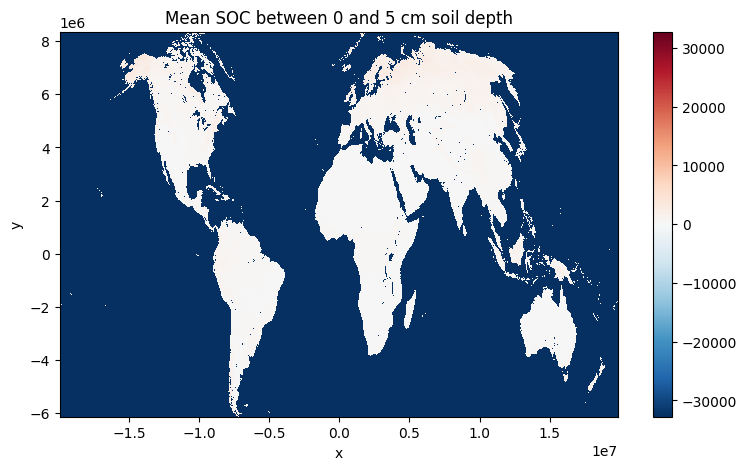

In [7]:

# # show metadata
# for key, value in soil_grids.metadata.items():
#     print(f"{key}: {value}")

# # plot data - doesn't work because fillvalue is a large negative number
# mean_0_5_data.plot(figsize=(9, 5))
# plt.title("Mean SOC between 0 and 5 cm soil depth")


In [8]:
mean_0_5_data._FillValue # not sure how to change fillvalue

-32768

In [10]:
# we will convert to numpy
mean_0_5_np = mean_0_5_data.values
mean_0_5_np = mean_0_5_np.reshape(mean_0_5_np.shape[1], mean_0_5_np.shape[2]).astype('float') # reshape to 2d
mean_0_5_np[mean_0_5_np == mean_0_5_data._FillValue] = np.nan # replace fill value (used for water, etc.) with nan



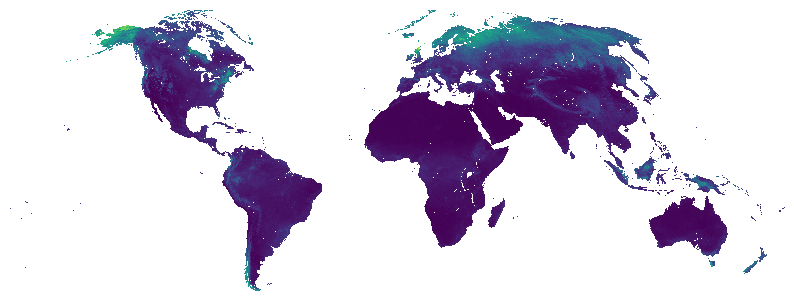

In [20]:

plt.imshow(mean_0_5_np, cmap = 'viridis' , interpolation = 'none')
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
fig.savefig('mean_0_5_eg.png', bbox_inches='tight', dpi=600)